In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
# Set parameters.
nx = 101  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 2  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

In [4]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50]),)


In [5]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


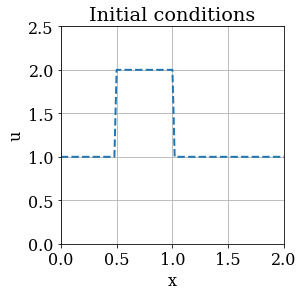

In [6]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [7]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

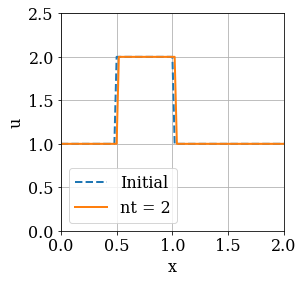

In [8]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

That's funny. Our square wave has definitely moved to the right, but it's no longer in the shape of a top-hat. What's going on?

The solution differs from the expected square wave because the discretized equation is an approximation of the continuous differential equation that we want to solve. There are errors: we knew that. But the modified shape of the initial wave is something curious. Maybe it can be improved by making the grid spacing finer. Why don't you try it? Does it help?

In [9]:
#making the number of dicrete points greater, and making the number of time steps smaller allows the orange curve 
#to appraoch the initial curve

In [26]:
# Set parameters.
nx = 51  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 2  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

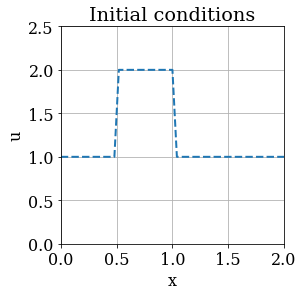

In [27]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

In [28]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

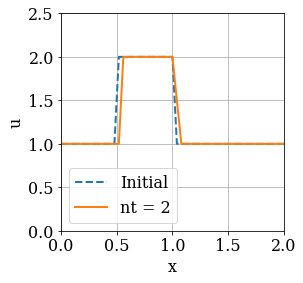

In [29]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

Hmm. That's quite interesting: like in the linear case, we see that we have lost the sharp sides of our initial square wave, but there's more. Now, the wave has also lost symmetry! It seems to be lagging on the rear side, while the front of the wave is steepening. Is this another form of numerical error, do you ask? No! It's physics!

Think about the effect of having replaced the constant wave speed c by the variable speed given by the solution u. It means that different parts of the wave move at different speeds. Make a sketch of an initial wave and think about where the speed is higher and where it is lower ...

In [30]:
#the issue is mostly fixed when the number of spatial discrete points is increased by 10, which makes the sides more
#sharp
#decreasing the number of time steps also brings the orange line to the left